# Описание проекта

Цель работы - основании доступных из открытых источников данных (до 2016 года) о продажах игр, оценке пользователей и экспертов, жанров и платформы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.




In [1]:
import pandas as pd

# Описание данных
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(60)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Заменяем названия столбцов (приведим к нижнему регистру).
   - В данных видим:
    - с столбце Name 2 значения из 16715 пропущено - можно просто эти строки удалить
    - в столбце Year_of_Release: около 300 пропущенных значений заполняе годом выпуска, совпадающим по названию игр 
    - в столбце Genre пропущенные значения удаляем, т.к. их всего 2
    - в столбце Critic_Score  пропущенные значения заполняем оценкой критиков у игр, совпадающим по названию, далее - средней
    - в столбце User_Score  пропуски заполняем средней оценкой, чтобы сильно на статистику не влияла (разброс значений 10, небольшой) и меняем тип данных на числовой       
    - в столбце Rating пропущенные значения заполняем аналогичным рейтингом как у игр, совпадающим по названию

In [5]:
games.columns = map(str.lower, games.columns)

In [6]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
games.dropna(subset=['name', 'genre'], inplace=True) # удаляем 2+2 строки

In [8]:
games['name'] = games['name'].str.lower() #переведем все в нижний регистр, чтобы не было разночтений

In [9]:
games['platform'] = games['platform'].str.lower()

In [10]:
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('max'))
#заменили год на максимальный=просто год для игр с аналогичным названием, т.к. не нашла метод, который просто возвращает значение..

In [11]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
games['critic_score'] = games['critic_score'].fillna(games.groupby('name')['critic_score'].transform('mean'))
# заменили оценку критиков на среднюю оценку по игре с аналогичным именем

In [13]:
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].mean())
# заменили оценку критиков на среднюю оценку по игре с аналогичным именем

In [14]:
print(len(games.groupby('name'))) # сколько названий игр

11559


In [15]:
print(len(games.groupby('year_of_release'))) # сколько годов выпуска

37


Видно, что у нас еще не изменились все значения названий, попробуем заменить на такие значения, которые у игр с такой же оценкой критиков.

In [16]:
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('critic_score')['year_of_release'].transform('max'))

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16712 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [18]:
games.dropna(subset=['year_of_release'], inplace=True) # удаляем последний пропуск

In [19]:
games['year_of_release'] = games['year_of_release'].astype(int) #переводим год в целые числа

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
name               16712 non-null object
platform           16712 non-null object
year_of_release    16712 non-null int64
genre              16712 non-null object
na_sales           16712 non-null float64
eu_sales           16712 non-null float64
jp_sales           16712 non-null float64
other_sales        16712 non-null float64
critic_score       16712 non-null float64
user_score         10013 non-null object
rating             9948 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [21]:
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('genre')['year_of_release'].transform('mean'))

'tbd' означает «будет объявлено дополнительно», соответственно, данных и не было. Заменяем на пропуски и в дальнейшем обрабатываем.

In [22]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce') #переводим в тип float, некоректные значения заменяются на NaN

In [23]:
games['user_score'] = games['user_score'].fillna(games.groupby('genre')['user_score'].transform('mean'))
# заменили оценку пользователей на среднюю по году и платформе

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
name               16712 non-null object
platform           16712 non-null object
year_of_release    16712 non-null int64
genre              16712 non-null object
na_sales           16712 non-null float64
eu_sales           16712 non-null float64
jp_sales           16712 non-null float64
other_sales        16712 non-null float64
critic_score       16712 non-null float64
user_score         16712 non-null float64
rating             9948 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,68.761399,7.301402,NaN
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,68.761399,7.619515,NaN


In [26]:
print(len(games['name'].unique())) # сколько всего уникальных имен

11558


In [27]:
print(len(games.groupby('rating'))) # сколько уникальных рейтингов

8


Рейтинги заполнены только для 6246 игр из 11559 уникальных. Получается, привязкой к названию мы пропуски в рейтинках не восстановим. 

Присвоение ESRB рейтинга не является юридически обязательной для выпуска игры. Тогда предполагаем, что рейтинги не присвайвались вовсе, поэтому эта информация отсутсвует.

Заменим пропуски на n/a (not available) - рейтинг не присуждался.


In [28]:
games['rating'] = games['rating'].fillna('n/a')

In [29]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] # добавляем столбец с суммарными продажами

In [30]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,68.761399,7.301402,n/a,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,68.761399,7.619515,n/a,31.38


In [31]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

In [33]:
print(games.groupby('year_of_release')['name'].count() )

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     339
2000     350
2001     484
2002     845
2003     785
2004     765
2005     947
2006    1020
2007    1202
2008    1440
2009    1431
2010    1271
2011    1153
2012     662
2013     549
2014     583
2015     610
2016     640
Name: name, dtype: int64


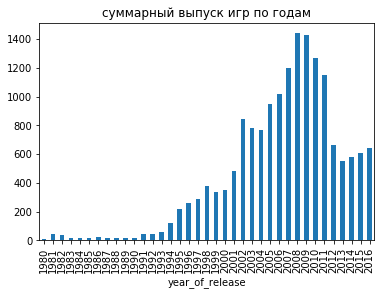

In [34]:
games.groupby('year_of_release')['name'].count().plot( kind='bar')
plt.title('суммарный выпуск игр по годам')
plt.show()

Видно, до 1993 каждый год выпускали менее 100 игр (от 9 до 60) - можно не учитывать этот непрерывный период. 
    - С 1994 по 2002 годы наблюдали постепенный рост
    - С 2003 по 2008 наблюдаем серьезные скачки на от 3 до 1440
    - с 2009 до 2011 медленный рост с 1431 до 1151, дольше падение в 2 раза в 2012 и дальнейший медленный рост.
   
   Провалы по количеству игр, но спорадические - период будем рассматривать.

In [35]:
games = games[games['year_of_release'] > 1993] # преобразовываем таблицу для периода после 1993

In [36]:
print(games.groupby('year_of_release')['name'].count() )

year_of_release
1994     121
1995     219
1996     263
1997     289
1998     379
1999     339
2000     350
2001     484
2002     845
2003     785
2004     765
2005     947
2006    1020
2007    1202
2008    1440
2009    1431
2010    1271
2011    1153
2012     662
2013     549
2014     583
2015     610
2016     640
Name: name, dtype: int64


In [37]:
print(games.groupby('platform')['total_sales'].sum())

platform
2600      10.50
3do        0.10
3ds      259.00
dc        15.95
ds       806.10
gb       153.11
gba      317.85
gc       198.93
gen        8.13
n64      218.68
nes        0.11
ng         1.23
pc       256.42
pcfx       0.03
ps       730.86
ps2     1255.77
ps3      939.65
ps4      314.14
psp      294.05
psv       54.07
sat       33.59
scd        0.36
snes      84.67
tg16       0.16
wii      907.51
wiiu      82.19
ws         1.42
x360     971.42
xb       257.68
xone     159.32
Name: total_sales, dtype: float64


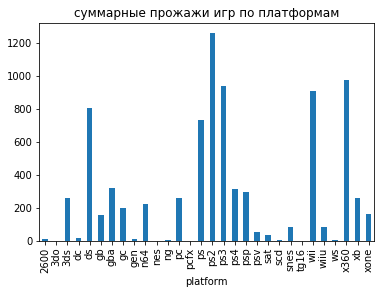

In [38]:
games.groupby('platform')['total_sales'].sum().plot( kind='bar')
plt.title('суммарные прожажи игр по платформам')
plt.show()

Максимальные продажи имеем для платформ:
    - ps3      540
    - x360     500
    - ds       460
    - wii      440
    - ps2      310

Построим их распределение по годам.

In [39]:
platform_top = games.query('platform in ("ps2", "x360", "ps3", "ds", "wii")').copy() #создаем таблицу, где оставляем только игры для пяти самых продаваемых платформ

In [40]:
platform_top = platform_top[['platform', 'year_of_release', 'total_sales']]

In [41]:
platform_top.head()

,platform,year_of_release,total_sales
0,wii,2006,82.54
2,wii,2008,35.52
3,wii,2009,32.77
6,ds,2006,29.80
7,wii,2006,28.91


Text(0, 0.5, 'total_sales for top5 platform')

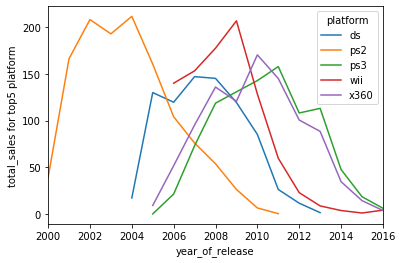

In [42]:
platform_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot() #строим распределение продаж по годам
plt.ylabel('total_sales for top5 platform')

Из графиков видим:
- платформа ps2 появляется сразу на пике в 2005 и исчезает в 2011
- платформа ds появляется в 2005 и исчезает в 2013
- платформа wii появляется в 2006 и исчезает в 2016
- платформа x360 появляется в 2005 и исчезает в 2016
- платформа ps3 появляется в 2005 и исчезает в 2016

Можно сделать вывод, что характерный срок появления и исчезновения платформ - 10-11 лет.
Именно это промежуток будем считать актуальным периодом.
Далее преобразуем таблицу так, чтобы не учитывать данные до этого периода, т.е.ранее 2005.

In [43]:
games = games[games['year_of_release'] > 2004]

In [44]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [45]:
platform = games[['platform', 'year_of_release', 'total_sales']] #делаем таблицу по платформам

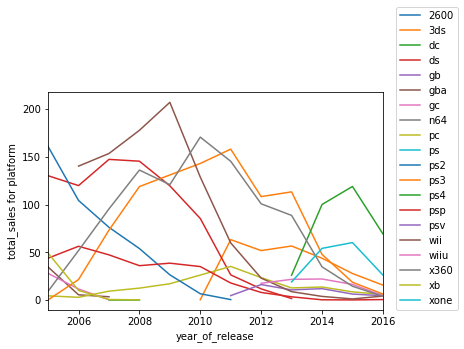

In [46]:
platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot() #строим распределение продаж по годам
plt.ylabel('total_sales for platform')
plt.legend(loc=(1.04,0))

Из лидирующих по продажам платформ  ps2, x360, wii, ds и ps3 все находятся в конце жизненного цикла.

Растущим по продажам платформ нет.

На конец периода (2016) потенциально прибыльными, хоть и спадающими, можно назвать 
- ds
- ps

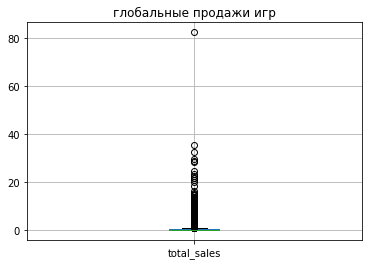

In [47]:
games.boxplot('total_sales') # график «ящик с усами» по глобальным продажам каждой игры 
plt.title('глобальные продажи игр')
plt.show()

In [48]:
games['total_sales'].describe()

count    11508.000000
mean         0.480750
std          1.538882
min          0.000000
25%          0.050000
50%          0.140000
75%          0.410000
max         82.540000
Name: total_sales, dtype: float64

 Видим, что медиана продаж  1.53, а среднее - 0,48. Выбросв много, вплоть до 82, отсечем явно выбивающиеся значения (IQR возьмем 3, чтобы не потерять лишнее). Получается, отсекаем цифры больше 2,62.

In [49]:
games = games[games['total_sales'] < 2.62]

In [50]:
#games.head(40)

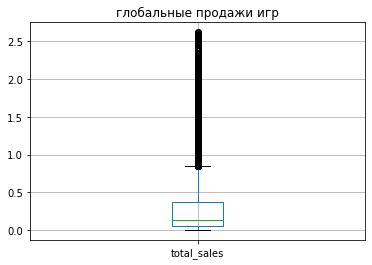

In [51]:
games.boxplot('total_sales') # график «ящик с усами» по глобальным продажам каждой игры после отсечения выбивающихся значений
plt.title('глобальные продажи игр')
plt.show()

Достаточно много выбросов осталось за пределами усов, все-таки лучше взять диапазон 1.5 IQR (до 2.08)

In [52]:
games = games[games['total_sales'] < 2.08]

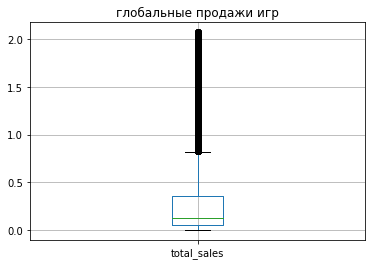

In [53]:
games.boxplot('total_sales') # график «ящик с усами» по глобальным продажам каждой игры после повторного отсечения выбивающихся значений
plt.title('глобальные продажи игр')
plt.show()

Text(0.5, 1.0, 'глобальные продажи игр с распределением по платформам')

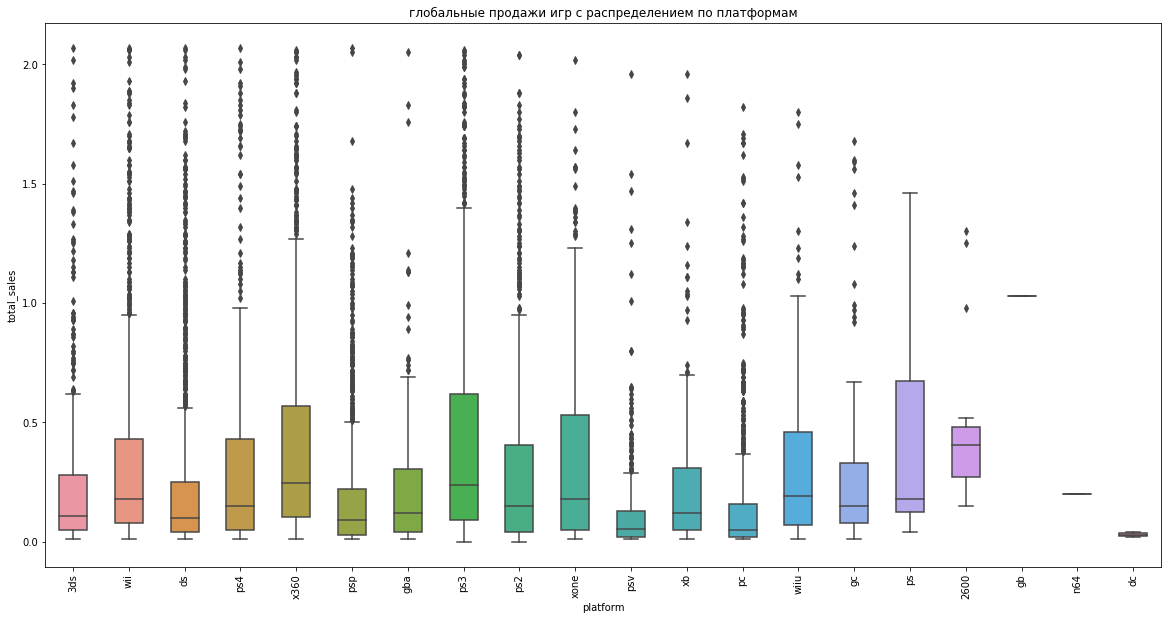

In [54]:
plt.figure(figsize=(20,10))
bplot=sns.boxplot(y='total_sales', x='platform', data=games, width=0.5) #глобальные продажи игр с распределением по платформам
plt.xticks(rotation=90)
plt.title('глобальные продажи игр с распределением по платформам')

##### Из графиков «ящик с усами» видим:
- глобальные продажи каждой игры лежат в диапазоне до 2.26 (выбивающиеся значения преимущественно отсекли). При этом большинство игр лежит в диапазоне 0.03 - 3.75.
- при разбивке продаж по платформам видим, что большинство продаж игр лежат в диапазоне от 0 до 0.7.

In [55]:
games['platform_mean'] = games.groupby('platform')['total_sales'].transform('mean')# добавляем столбец со средними продажами по платформе

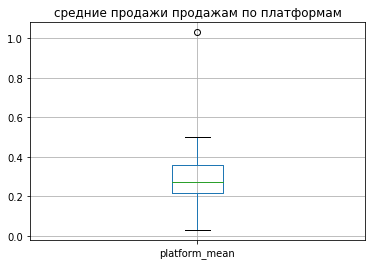

In [56]:
games.boxplot('platform_mean') # график «ящик с усами» по средним продажам продажам по платформам
plt.title('средние продажи продажам по платформам')
plt.show()

Разница в средних продажах по платформам отличается от продаж игр - здесь весь диапазон укладывается в пределах 0.22 - 0.38. 

In [57]:
games_wii = games.loc[games['platform'] == 'wii'] #делаем таблицу для платформы wii

In [58]:
#games_wii.head(30)

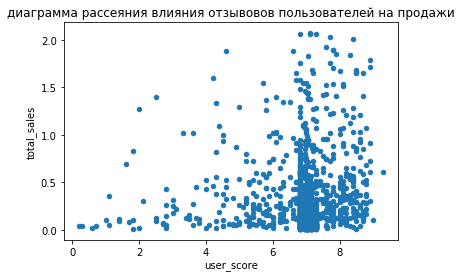

In [59]:
games_wii.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('диаграмма рассеяния влияния отзывовов пользователей на продажи')
plt.show()

In [60]:
print(games_wii['user_score'].corr(games_wii['total_sales'])) #считаем коэффицент корреляции между отзывами пользователей и продажами

0.08820241408774719


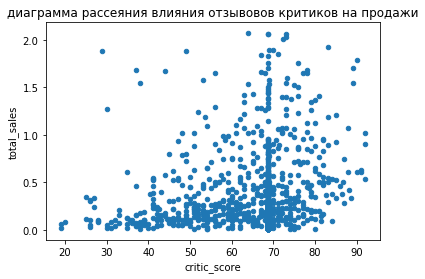

In [61]:
games_wii.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('диаграмма рассеяния влияния отзывовов критиков на продажи')
plt.show()

In [62]:
print(games_wii['critic_score'].corr(games_wii['total_sales'])) #считаем коэффицент корреляции между отзывами критиков и продажами

0.1379781913590146


Видим и для отзывов пользователей, и для отзывов критиков критиков примерно схожее распределение. При оценке как пользователей, так и критиков более 5 из 10 и 50 из 100 соответсвенно, продажи выше, но не существенно.

Смотрим на корреляции:
- 0.077 для влияния на продажи оценок пользователей
- 0.154 для влияния на продажи оценок критиков.

Такие значения коэффицента корреляции говорят об очень слабой корреляции.
Похоже, игры на платформе wii сами по себе хороши.

In [63]:
games_no_wii = games.loc[games['platform'] != 'wii'] #делаем таблицу для всех платформ без wii

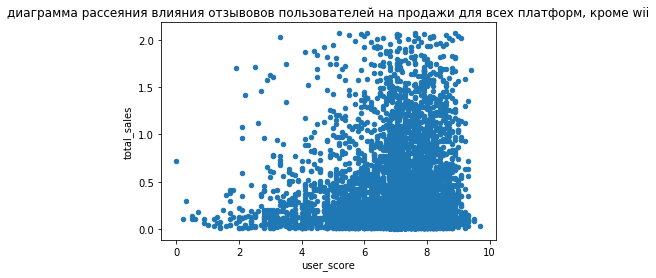

In [64]:
games_no_wii.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('диаграмма рассеяния влияния отзывовов пользователей на продажи для всех платформ, кроме wii')
plt.show()

In [65]:
print(games_no_wii['user_score'].corr(games_no_wii['total_sales'])) #считаем коэффицент корреляции между отзывами пользователей и продажами на всех платформах , кроме wii

0.061453363193472096


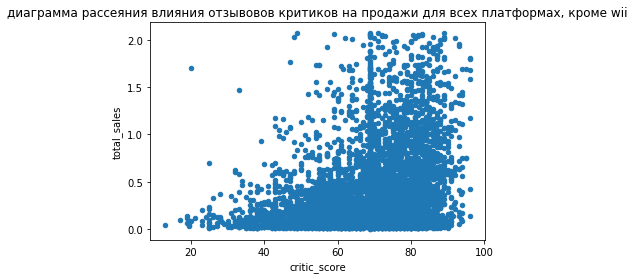

In [66]:
games_no_wii.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('диаграмма рассеяния влияния отзывовов критиков на продажи для всех платформах, кроме wii')
plt.show()

In [67]:
print(games_no_wii['critic_score'].corr(games_no_wii['total_sales'])) #считаем коэффицент корреляции между отзывами критиков и продажами

0.2664266522725861


 Соотносим выводы по диаграммах рассеивания влияния на продажи оценок пользоватей и критиков для популярной платформы wii и всех других платформ.
 
Видим и для отзывов пользователей, и для отзывов критиков критиков примерно схожее распределение. 

При оценке как пользователей, так и критиков более 5 из 10 и 50 из 100 соответсвенно, продажи существенно выше, чем для распределения игр платформы wii.

Корреляции:
- 0.063 для влияния на продажи оценок пользователей
- 0.28 для влияния на продажи оценок критиков.

Значения коэффицентов корреляции говорят об слабой корреляции продаж для игр всех других платформ и оценок пользователей/критиков.

Text(0.5, 1.0, 'глобальные продажи игр с распределением по жанрам')

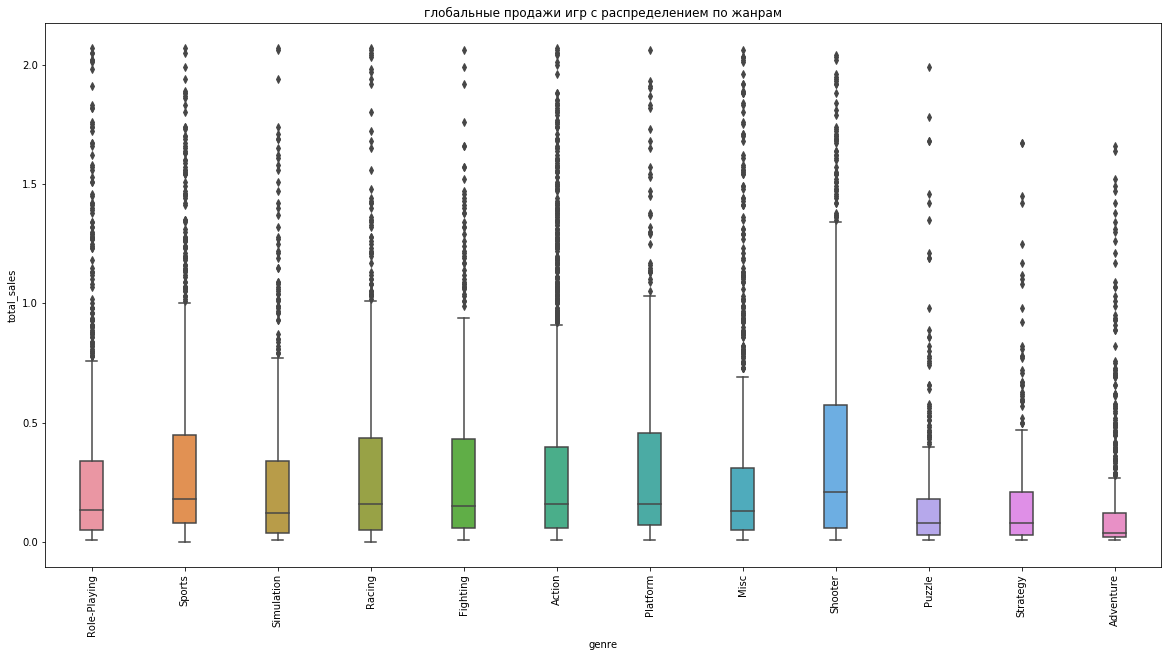

In [68]:
plt.rcParams['figure.figsize']=(20,10)
bplot=sns.boxplot(y='total_sales', x='genre', data=games, width=0.25) #глобальные продажи игр с распределением по жанрам
plt.xticks(rotation=90)
plt.title('глобальные продажи игр с распределением по жанрам')

Из графиков видно, что выделяются жанры с высокими и низкими продажами.
- Топ 5 жанров по продажам выглядит так:
    - Shooter
    - Sports
    - Platform
    - Racing
    - Fighting

Жанры c Pazzle, Adventure, Stragedy имеют самые низкие продажи(распределены с уровнем примерно в два раза меньше среднего).  
    

Составляем портрет пользователя каждого региона

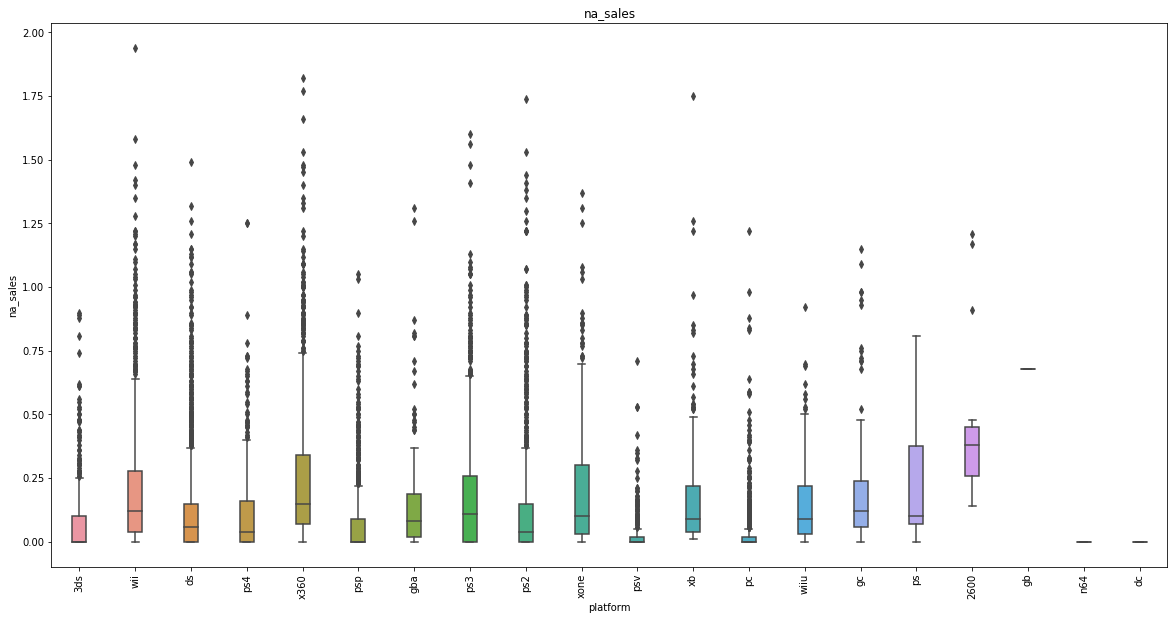

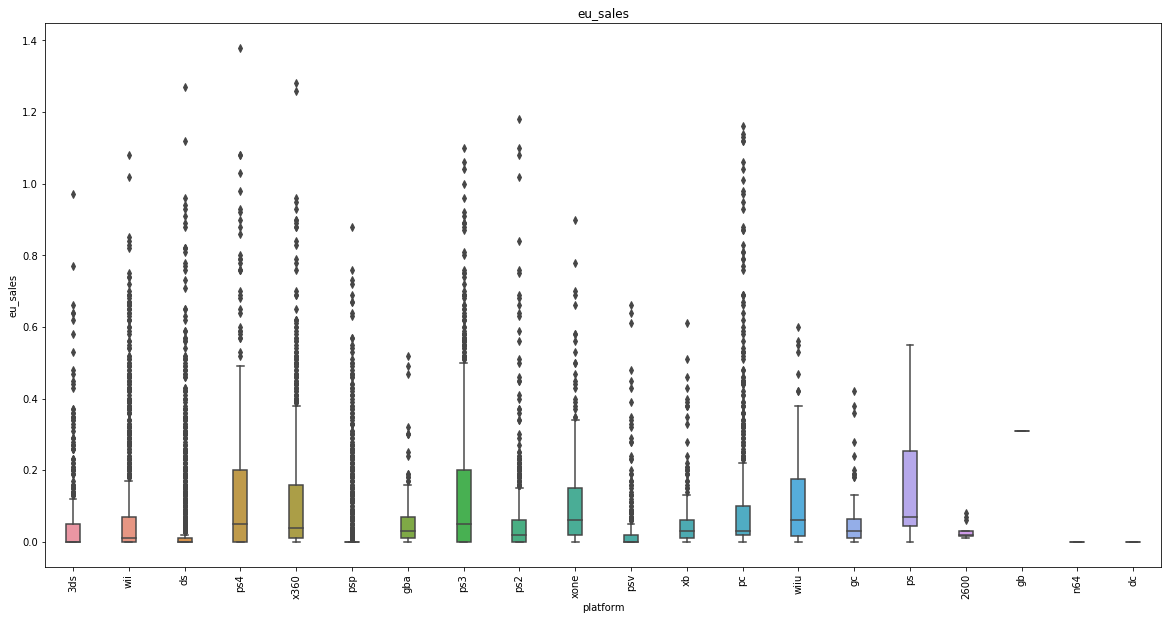

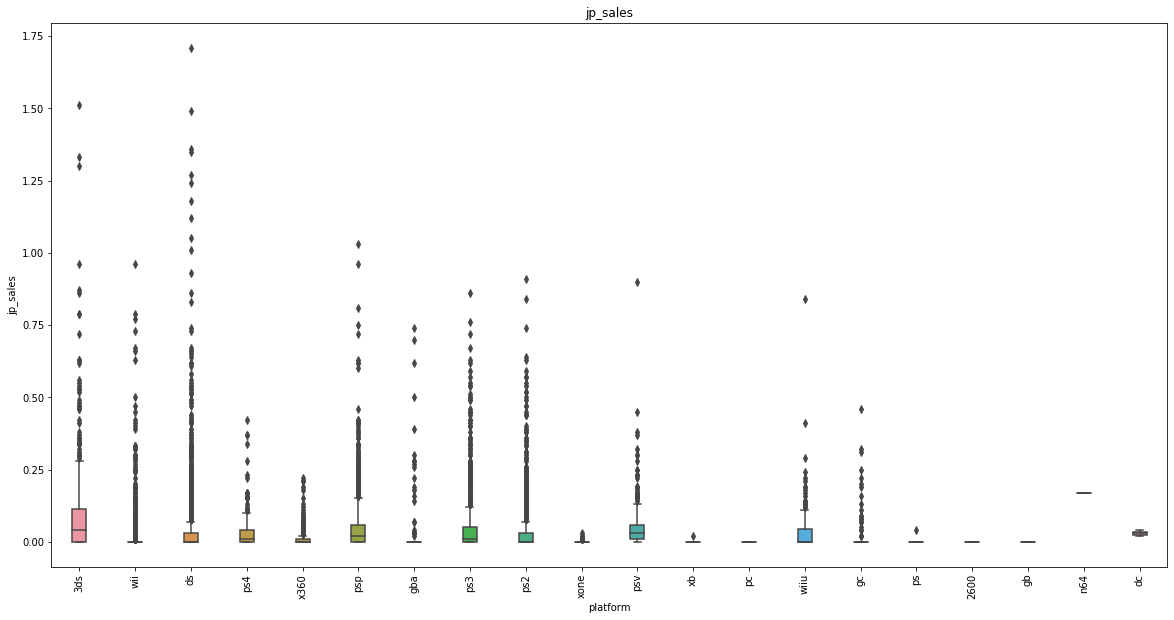

In [69]:
for column in games[['na_sales', 'eu_sales', 'jp_sales']]: # продажи игр по регионам с распределением по платформам
    plt.rcParams['figure.figsize']=(20,10)
    bplot=sns.boxplot(y=column, x='platform', data=games, width=0.25) 
    plt.xticks(rotation=90)
    plt.title(column)
    plt.show()

###### При распределении по платформам топ5 по регионам выглядят следующим образом:
    - na:
        - 2600
        - ps
        - x360
        - wii
        - xone
    - eu:
        - wii
        - ps
        - x360
        - ps3
        - ps4
    - jp:
        - wiu
        - 3ds
        - ps3
        - psv
        - psp


Продажи для Северное Америки и Европе лежат примерно в одном диапазоне.
В Японии продажи значительно ниже в целом (как и выборка сама по себе).

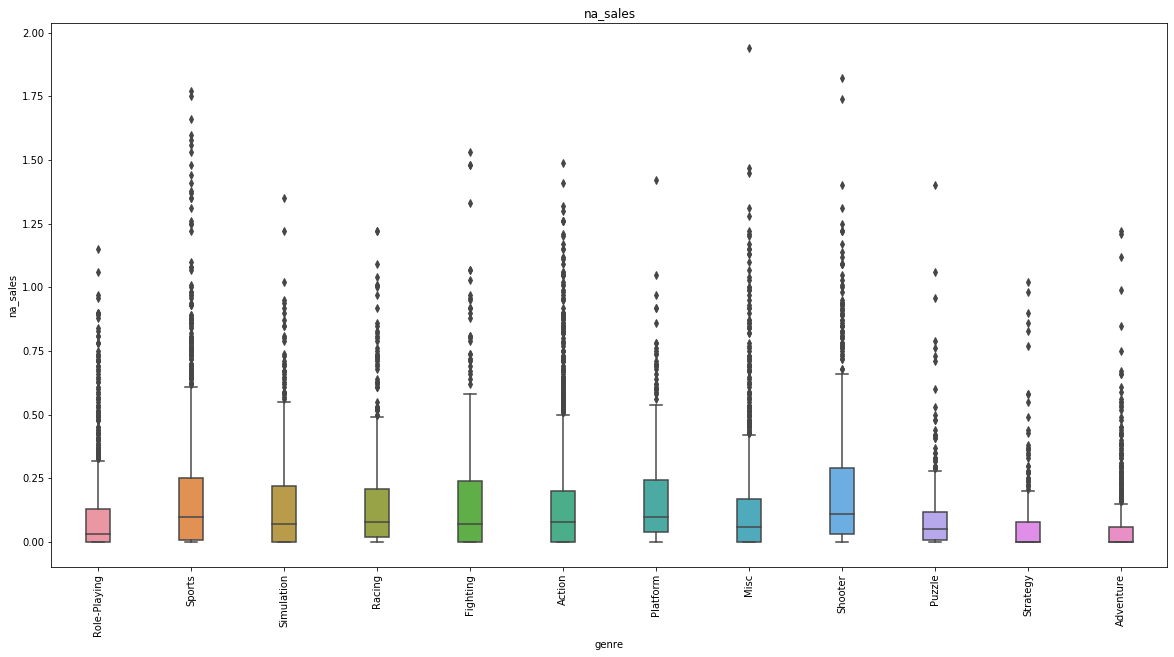

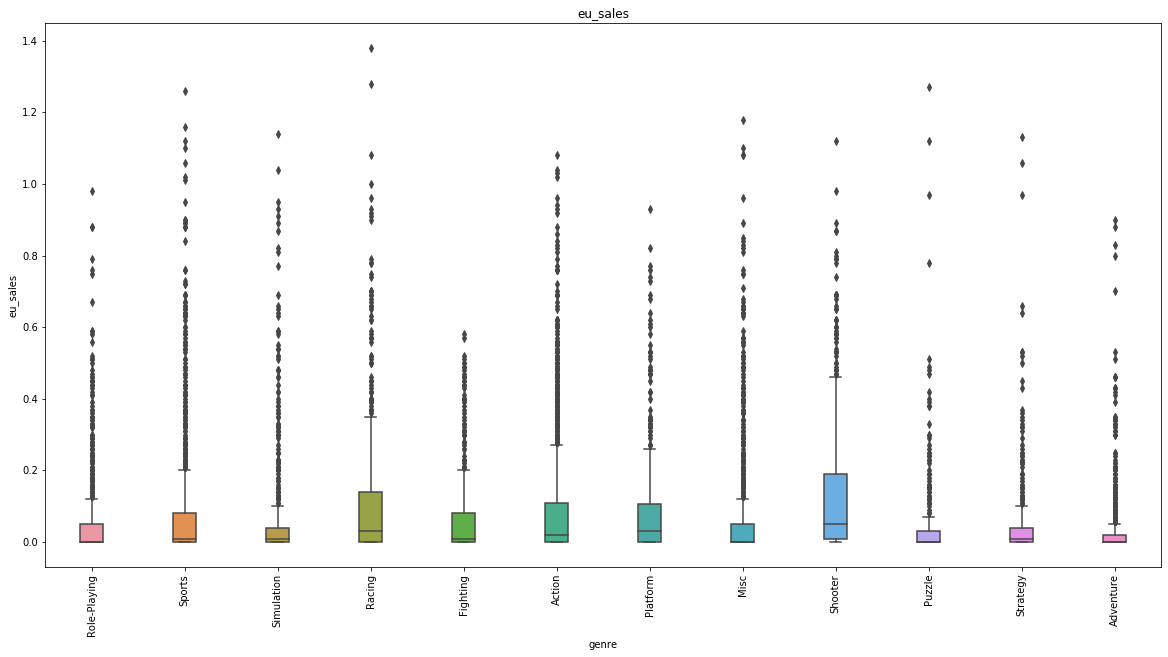

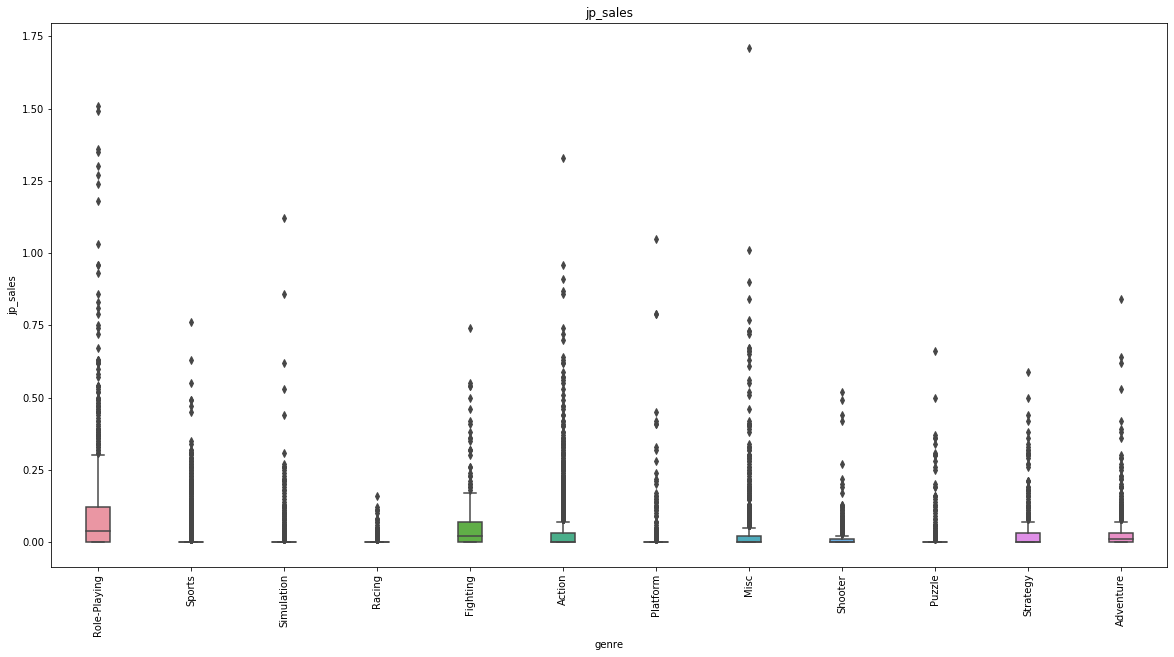

In [70]:
for column in games[['na_sales', 'eu_sales', 'jp_sales']]: # продажи игр по регионам с распределением по жанрам
    plt.rcParams['figure.figsize']=(20,10)
    bplot=sns.boxplot(y=column, x='genre', data=games, width=0.25) 
    plt.xticks(rotation=90)
    plt.title(column)
    plt.show()

При распределении по жанрам топ5 по регионам выглядят следующим образом:
    - na:
        - Shuter
        - Sports
        - Fighting
        - Racing
        - Platform
    - eu:
        - Shuter
        - Action
        - Fighting
        - Racing
        - Platform
    - jp:
        - Fighting
        - Action
        - Role-Playing
        - Strategy
        - Adventure

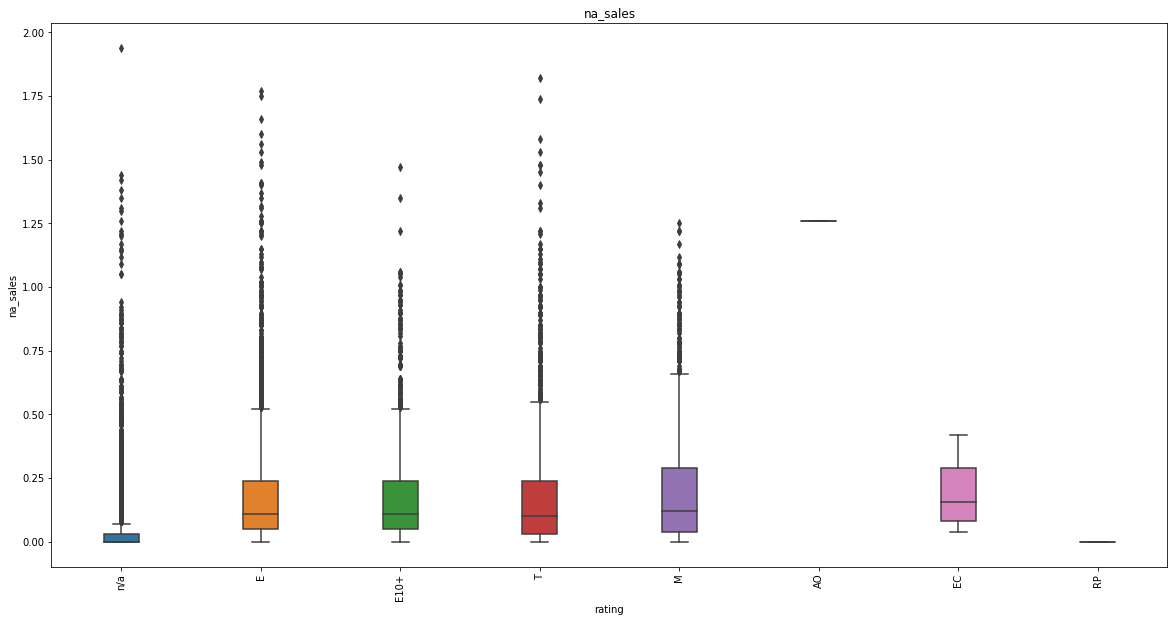

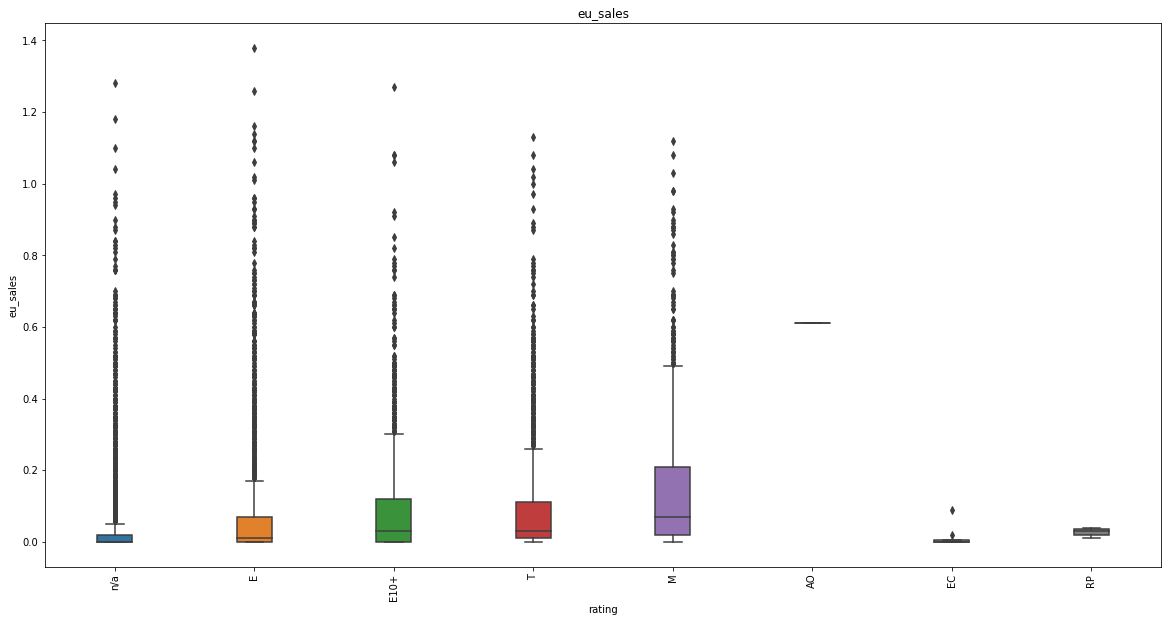

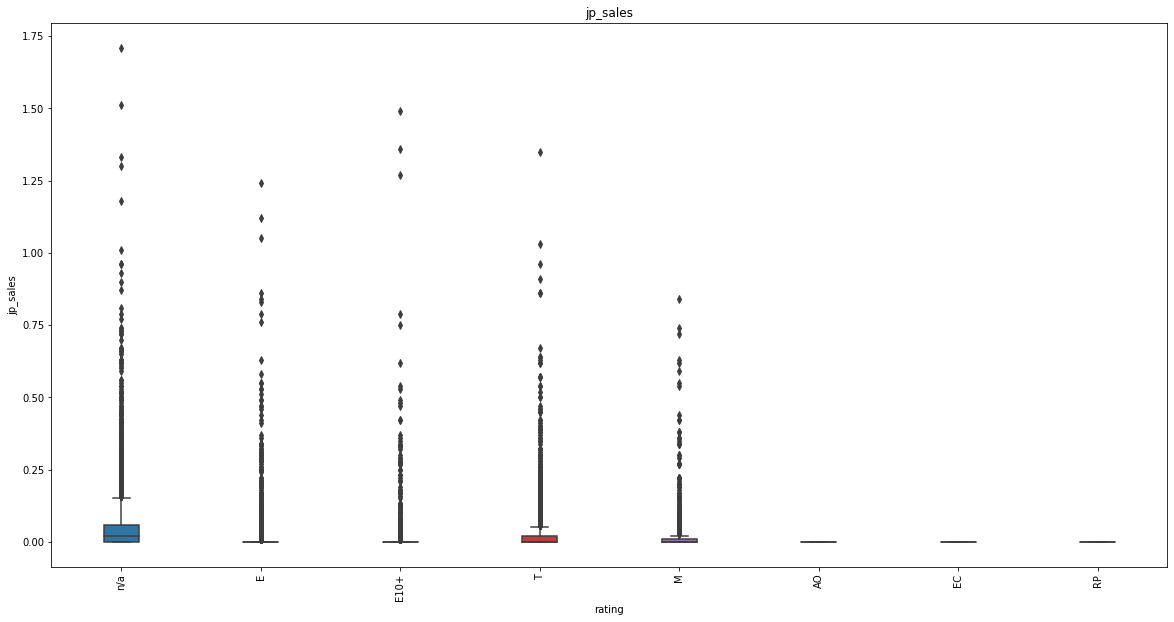

In [71]:
for column in games[['na_sales', 'eu_sales', 'jp_sales']]: # продажи игр по регионам с распределением по рейтингу
    plt.rcParams['figure.figsize']=(20,10)
    bplot=sns.boxplot(y=column, x='rating', data=games, width=0.25) 
    plt.xticks(rotation=90)
    plt.title(column)
    plt.show()

В Северной Америке и Европе игры из любой категории при наличии рейтинга продается в несколько раз лучше игр, где рейтинг не присвоен. Соответсвенно,  наличие рейтинга оказывает сильное влияние.

В Японии игр с рейтингом игры без рейтинга продаются лучше всего, поэтому рейтинг, как минимум, не оказывает положительного влияния на продажи, а возможно, даже служит ограничивающим фактором.

Проверяем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (нулевая гипотеза).
- Альтернативную гипотезу сформулируем так:
средние пользовательские рейтинги платформ Xbox One и PC не равны.

Дисперсии выборок считаем примерно равными.

In [72]:
from scipy import stats as st

In [73]:
xbox_one = games.loc[games['platform']=='xone']# создаем таблицу только для игр с платфмой xbox_one

In [74]:
#xbox_one.info()

In [75]:
pc = games.loc[games['platform']=='pc'] # создаем таблицу только для игр с платфмой pc

In [76]:
#pc.info()

In [77]:
import numpy as np

In [78]:
alpha = 0.05  #критический уровень статистической значимости
results = st.ttest_ind(xbox_one['user_score'], pc['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.029110461475698846
Отвергаем нулевую гипотезу


Вывод: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Проверяем гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.
- Альтернативную гипотезу сформулируем так:
средние пользовательские рейтинги жанров Action и Sports разные (будет принята, если удастся опровергнуть альтернативную гипотезу).
Дисперсии выборок считаем примерно равными.

In [79]:
action = games.loc[games['genre']=='Action']# создаем таблицу только для игр с жанром экшню.

In [80]:
#action.info()

In [81]:
sports = games.loc[games['genre']=='Sports']# создаем таблицу только для игр с жанром спорт.

In [82]:
alpha = 0.05  #критический уровень статистической значимости
results = st.ttest_ind(action['user_score'], sports['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.033834981176057e-09
Отвергаем нулевую гипотезу


Вывод: средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез дисперсия каждой выборки была оценена по по объединенному датасету из двух выборок, а не для каждой по отдельности по значениям в ней самой. Это позволяет получить более точные результаты, если считать дисперсии генеральных соворупностей примерно равными.

# Вывод



Сначала изучаем данные и проводим их предобработку.
   
    В данных видим:
        - с столбце Name 2 значения из 16715 пропущено - можно просто эти строки удалить
        - в столбце Year_of_Release: около 300 пропущенных значений заполняе годом выпуска, совпадающим по названию игр, далее - на такие же значения, которые и у игр с такой же оценкой критиков. Меняем тип данных на int
        - в столбце Genre пропущенные значения удаляем, т.к. их всего 2
        - в столбце Critic_Score пропущенные значения заполняем оценкой критиков у игр, совпадающим по названию, далее -средней
        - в столбце User_Score пропуски заполняем средней оценкой, чтобы сильно на статистику не влияла (разброс значений 10, небольшой) и меняем тип данных на числовой
        - в столбце Rating пропущенные значения сначала пытались заполнять аналогичным рейтингом как у игр, совпадающим по названию. Обнаружили, что рейтинги заполнены только для 6246 игр из 11559 уникальных. Получается, привязкой к названию мы пропуски в рейтинках не восстановим.Присвоение ESRB рейтинга не является юридически обязательной для выпуска игры. Тогда предполагаем, что рейтинги не присвайвались вовсе, поэтому эта информация отсутсвует.Заменим пропуски на n/a (not available) - рейтинг не присуждался.
        
   При обработке данных в графе год выпуска всплыло большое количество 'tbd', что означает «будет объявлено дополнительно», соответственно, данных и не было. Заменяли на пропуски и в дальнейшем обрабатывали вместе.
   
Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.
   
Посмотрели, сколько игр выпускалось в разные годы.
Видно, что до 1993 каждый год выпускали менее 100 игр (от 9 до 60) - можно не учитывать этот непрерывный период.
- Далее имеем:
    - С 1994 по 2002 годы наблюдали постепенный рост
    - С 2003 по 2008 наблюдаем серьезные скачки на от 3 до 1440
    - с 2009 до 2011 медленный рост с 1431 до 1151, дальше падение в 2 раза в 2012 и дальнейший медленный рост.
    Провалы по количеству игр, но спорадические - период будем рассматривать.
    
Преобразовываем таблицу для периода после 1993 и дальше работаем с ней.

Посмотрели, как менялись продажи по платформам.
Максимальные продажи имеем для платформ:

- ps3 (540)
- x360 (500)
- ds (460)
- wii (440)
- ps2 (310)

Построили их распределение по годам.

Из графиков видим:

- платформа ps2 появляется сразу на пике в 2005 и исчезает в 2011
- платформа ds появляется в 2005 и исчезает в 2013
- платформа wii появляется в 2006 и исчезает в 2016
- платформа x360 появляется в 2005 и исчезает в 2016
- платформа ps3 появляется в 2005 и исчезает в 2016

Можно сделать вывод, что характерный срок появления и исчезновения платформ - 10-11 лет. Именно это промежуток будем считать актуальным периодом. Далее преобразуем таблицу так, чтобы не учитывать данные до этого периода, т.е.ранее 2005.

Из лидирующих по продажам платформ ps2, x360, wii, ds и ps3 все находятся в конце жизненного цикла.

Растущим по продажам платформ нет.

На конец периода (2016) потенциально прибыльными, хоть и спадающими, можно назвать
- ds
- ps

Построили график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

Из графиков «ящик с усами» видим:
глобальные продажи каждой игры лежат в диапазоне до 2.26 (выбивающиеся значения преимущественно отсекли). При этом большинство игр лежит в диапазоне 0.03 - 3.75.
при разбивке продаж по платформам видим, что большинство продаж игр лежат в диапазоне от 0 до 0.7.

Разница в средних продажах по платформам отличается от продаж игр - здесь весь диапазон укладывается в пределах 0.22 - 0.38.

Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. 
- Увидели и для отзывов пользователей, и для отзывов критиков критиков примерно схожее распределение. При оценке как пользователей, так и критиков более 5 из 10 и 50 из 100 соответсвенно, продажи выше, но не существенно.

Смотрим на корреляции:
- 0.077 для влияния на продажи оценок пользователей
- 0.154 для влияния на продажи оценок критиков.
Такие значения коэффицента корреляции говорят об очень слабой корреляции. Похоже, игры на платформе wii сами по себе хороши.

Соотносим выводы по диаграммах рассеивания влияния на продажи оценок пользоватей и критиков для популярной платформы wii и всех других платформ.

Видим и для отзывов пользователей, и для отзывов критиков критиков примерно схожее распределение.

При оценке как пользователей, так и критиков более 5 из 10 и 50 из 100 соответсвенно, продажи существенно выше, чем для распределения игр платформы wii.

Корреляции:
- 0.063 для влияния на продажи оценок пользователей
- 0.28 для влияния на продажи оценок критиков.
Значения коэффицентов корреляции говорят о слабой корреляции продаж для игр всех других платформ и оценок пользователей/критиков.

Получается, выводы по корреляции схожи в обоих случаях.

Посмотрели на общее распределение игр по жанрам. 
- Из графиков видно, что выделяются жанры с высокими и низкими продажами.

Топ 5 жанров по продажам выглядит так:
- Shooter
- Sports
- Platform
- Racing
- Fighting

Жанры c Pazzle, Adventure, Stragedy имеют самые низкие продажи(распределены с уровнем примерно в два раза меньше среднего).

Составляем портрет пользователя каждого региона.

Северная Америка.
- При распределении по платформам топ5:
    - 2600
    - ps
    - x360
    - wii
    - xone
- При распределении по жанрам топ5:
    - Shuter
    - Sports
    - Fighting
    - Racing
    - Platform    
    
Европа.
- При распределении по платформам топ5:
    - wii
    - ps
    - x360
    - ps3
    - ps4
- При распределении по жанрам топ5 :    
    - Shuter
    - Action
    - Fighting
    - Racing
    - Platform

Япония.
- При распределении по платформам топ5:
    - wii
    - ds
    - sds
    - ps3
    - psp
- При распределении по жанрам топ5: 
    - Fighting
    - Action
    - Role-Playing
    - Strategy
    - Adventure
    
Топ продаж распределеных по платформам для Северной Америки, Европы и Японии включают игры на платформе wii, а топ продаж распределеных по платформам для Северной Америки и Европы включают по ps и x360.

Топ продаж при распределении по жанрам для Северной Америки и Европы одинаковое, с Японией у них две общие категории - Action и Fighting.

Попробовали определить, влияет ли рейтинг ESRB на продажи в отдельном регионе. Для этого изучили продажи игр по регионам с распределением по рейтингу

В Северной Америке и Европе игры из любой категории при наличии рейтинга продается в несколько раз лучше игр, где рейтинг не присвоен. Соответсвенно, наличие рейтинга оказывает сильное влияние.

В Японии игр с рейтингом игры без рейтинга продаются лучше всего, поэтому рейтинг, как минимум, не оказывает положительного влияния на продажи, а возможно, даже служит ограничивающим фактором.

Проверяем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (нулевая гипотеза).

Альтернативную гипотезу сформулируем так: средние пользовательские рейтинги платформ Xbox One и PC не равны.
Дисперсии выборок считаем примерно равными.
Получаем p-значение: 0.029 и отвергаем нулевую гипотезу.
- Вывод: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Проверяем гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативную гипотезу сформулируем так: средние пользовательские рейтинги жанров Action и Sports разные (будет принята, если удастся опровергнуть альтернативную гипотезу). Дисперсии выборок считаем примерно равными.

Получаем p-значение: 8.339905128964944e-10 и отвергаем нулевую гипотезу
- Вывод: средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез дисперсия каждой выборки была оценена по по объединенному датасету из двух выборок, а не для каждой по отдельности по значениям в ней самой. Это позволяет получить более точные результаты, если считать дисперсии генеральных соворупностей примерно равными.        

Основной вывод:

- имеющихся данных достаточно, чтобы отработать принцип работы с ними и иметь возможность определять популярные платформы и жанры, привлекательный регион продаж, влияние экспертных и пользовательских оценок на возможные прожажи, а также определять этап жизненного цикла продукта.

На данный момент самыми привлекательными продуктами будут игры платформ ds, ps при продаже их в Северной Америке и Европе, особенно для жанров Shuter, Action, Racing, Fighting, Platform, с присвоенным рейтингом ESRB.